# Data Cleaning and Processing

In [1]:
# INF2178 - Technical Assignment 4
# Student Name: Shen Zhang
# Student ID: 1009901368
# Master of Information

In [2]:
from google.colab import files
uploaded = files.upload()

Saving INF2178_A4_data.csv to INF2178_A4_data.csv


In [3]:
# import package before analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

# load the csv data file
mydata = pd.read_csv('INF2178_A4_data.csv')
# check the first 10 rows of our dataset
mydata.head(10)

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
5,6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
6,7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
7,8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
8,10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
9,13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380


In [4]:
# check the general information of the dataset
mydata.info()
# check the descriptive statistical description of the dataset
mydata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         279 non-null    float64
 11  MMSE        293 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV        294 non-null    int64  
 14  nWBV        294 non-null    float64
 15  ASF         294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB


,Unnamed: 0,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,294.000000,294.000000,294.000000,294.000000,294.000000,279.000000,293.000000,294.000000,294.000000,294.000000,294.000000
mean,190.421769,1.489796,349.785714,76.411565,14.561224,2.491039,27.259386,0.301020,1478.853741,0.731381,1.203109
std,106.686740,0.500748,400.741520,7.607074,2.884818,1.128008,3.413454,0.381347,176.559755,0.037373,0.139365
min,0.000000,1.000000,0.000000,60.000000,6.000000,1.000000,15.000000,0.000000,1106.000000,0.646000,0.876000
25%,99.000000,1.000000,0.000000,71.000000,12.000000,2.000000,26.000000,0.000000,1347.250000,0.703000,1.118250
50%,195.500000,1.000000,0.000000,76.000000,14.500000,2.000000,29.000000,0.000000,1461.500000,0.732000,1.201000
75%,282.750000,2.000000,671.500000,81.000000,16.000000,3.000000,30.000000,0.500000,1569.000000,0.756000,1.302750
max,371.000000,2.000000,1707.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [5]:
# check for the null/missing values and sum it up
mydata.isnull().sum()
# 'SES' has 15 missing values,'MMSE' has 1 missing value

Unnamed: 0     0
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE           1
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [6]:
# Dealing with the null values for 'SES' and 'MMSE'
colnames = ['SES','MMSE']
mydata.dropna(subset=colnames,inplace=True)
# since the 'Unnamed: 0' column is not necessary for our analysis.We should drop it.
colname = ['Unnamed: 0']
mydata_cleaned = mydata.drop('Unnamed: 0',axis=1)
mydata_cleaned

# do the quantitative analysis again for exploring dataset's characteristics
sum_stat = mydata_cleaned.describe(include='all')
print(sum_stat)

# check the null values again
null_values2 = mydata_cleaned.isnull().sum()
null_values2

       Subject ID         MRI ID        Group       Visit     MR Delay  M/F  \
count         279            279          279  279.000000   279.000000  279   
unique        142            279            3         NaN          NaN    2   
top     OAS2_0001  OAS2_0001_MR1  Nondemented         NaN          NaN    F   
freq            2              1          142         NaN          NaN  165   
mean          NaN            NaN          NaN    1.491039   353.200717  NaN   
std           NaN            NaN          NaN    0.500818   404.525563  NaN   
min           NaN            NaN          NaN    1.000000     0.000000  NaN   
25%           NaN            NaN          NaN    1.000000     0.000000  NaN   
50%           NaN            NaN          NaN    1.000000     0.000000  NaN   
75%           NaN            NaN          NaN    2.000000   673.000000  NaN   
max           NaN            NaN          NaN    2.000000  1707.000000  NaN   

       Hand         Age        EDUC         SES    

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

# Exploratory Data Analysis (EDA)

### Data Visualization through Numerical Fields

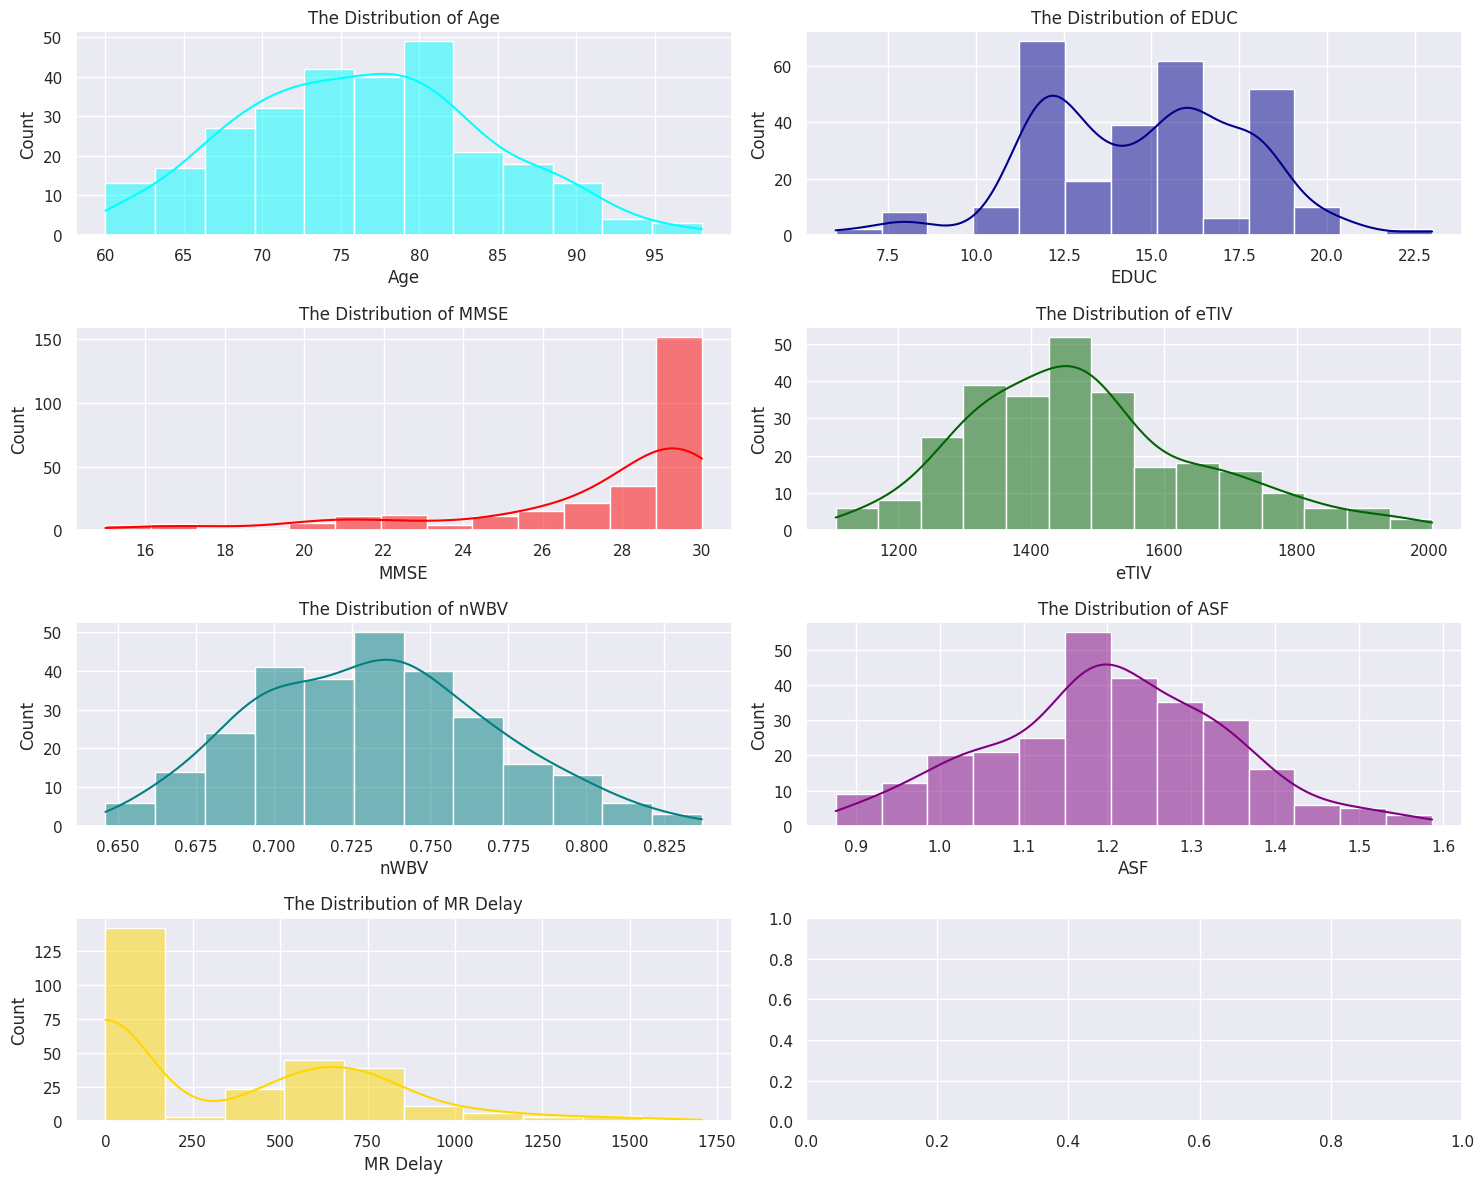

In [7]:
# Set the "darkgrid" background for plots
sns.set(style="darkgrid")

# Preparing the figure layout
fig,axes = plt.subplots(nrows=4, ncols=2,figsize=(15,12))

# Plotting histograms for numberical variables
sns.histplot(mydata_cleaned['Age'], kde=True, ax=axes[0,0], color='cyan')
sns.histplot(mydata_cleaned['EDUC'], kde=True, ax=axes[0,1], color='darkblue')
sns.histplot(mydata_cleaned['MMSE'], kde=True, ax=axes[1,0], color='red')
sns.histplot(mydata_cleaned['eTIV'], kde=True, ax=axes[1,1], color='darkgreen')
sns.histplot(mydata_cleaned['nWBV'], kde=True, ax=axes[2,0], color='teal')
sns.histplot(mydata_cleaned['ASF'], kde=True, ax=axes[2,1], color='purple')
sns.histplot(mydata_cleaned['MR Delay'], kde=True, ax=axes[3,0], color='gold')

# Setting the tittles for the plots
axes[0,0].set_title('The Distribution of Age')
axes[0,1].set_title('The Distribution of EDUC')
axes[1,0].set_title('The Distribution of MMSE')
axes[1,1].set_title('The Distribution of eTIV')
axes[2,0].set_title('The Distribution of nWBV')
axes[2,1].set_title('The Distribution of ASF')
axes[3,0].set_title('The Distribution of MR Delay')

# Setting layout to avoid overlapping and show the plots
plt.tight_layout()
plt.show()

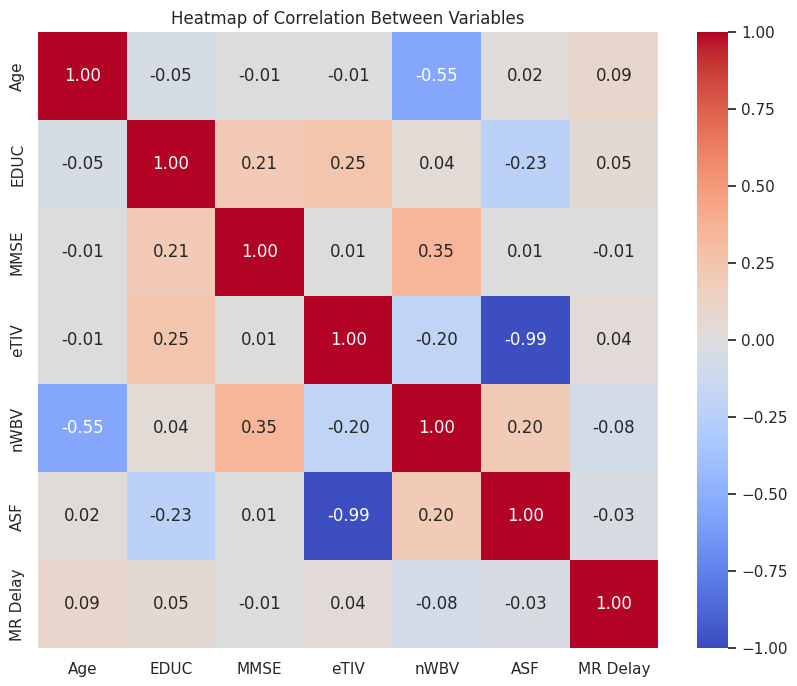

In [8]:
# Filter the data by dropping rows where specified columns have the missing values
mydata_filter = mydata_cleaned[['Age','EDUC','MMSE','eTIV','nWBV','ASF','MR Delay']].dropna()

# calculate the correlation matrix using heatmap
corl = mydata_filter.corr()
# Plot the heatmap
plt.figure(figsize=(10,8)) # set the figure size
hp = sns.heatmap(corl, annot=True,fmt='.2f',cmap='coolwarm',vmin=-1,vmax=1)
# set title and show the plot
plt.title('Heatmap of Correlation Between Variables')
plt.show()

### Data Visualization through Categotical Fields

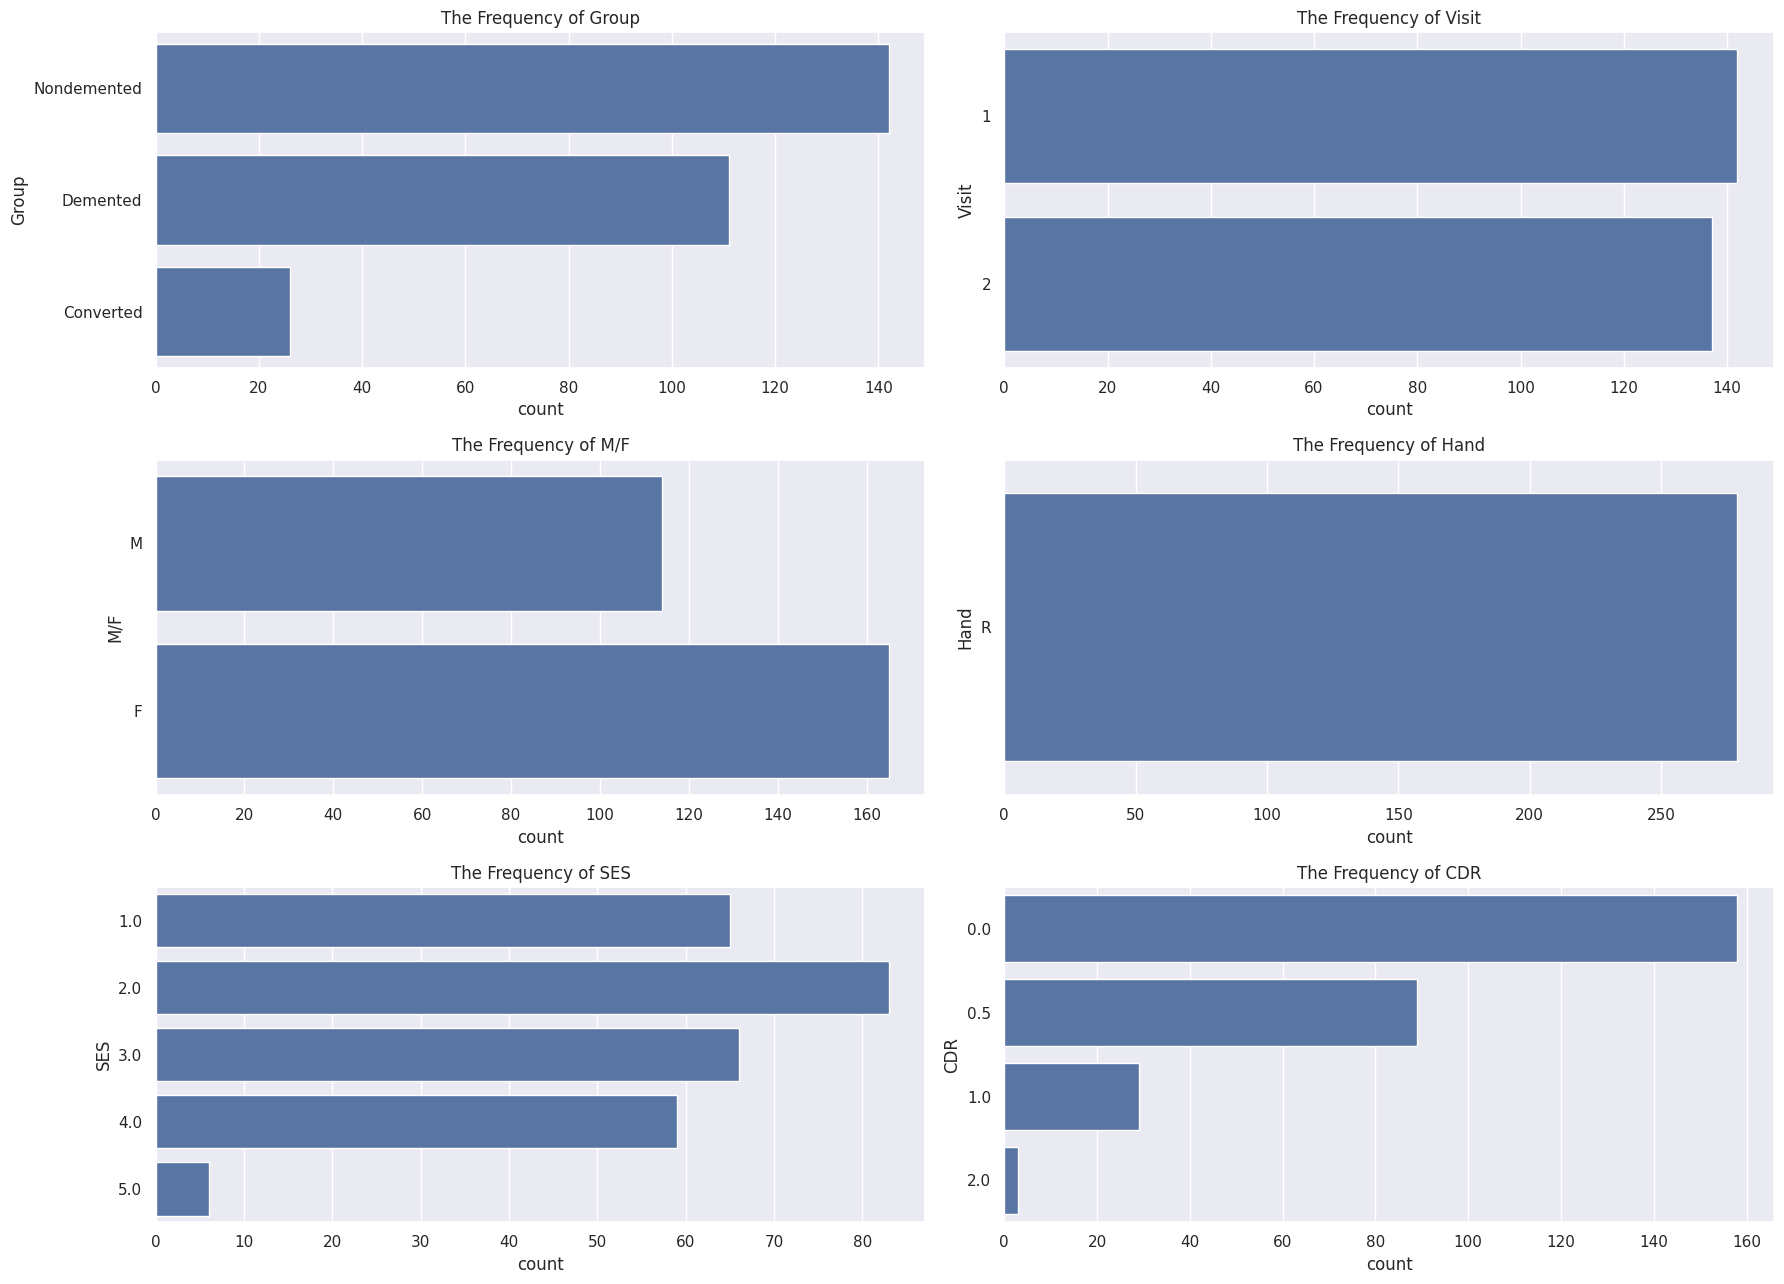

In [9]:
# Set the "darkgrid" background for plots
sns.set(style="darkgrid")

# Preparing the figure layout
fig,axes = plt.subplots(nrows=3, ncols=2,figsize=(18,13))

# Plotting the countplots for numberical variables
sns.countplot(y=mydata_cleaned['Group'],ax=axes[0,0])
sns.countplot(y=mydata_cleaned['Visit'],ax=axes[0,1])
sns.countplot(y=mydata_cleaned['M/F'],ax=axes[1,0])
sns.countplot(y=mydata_cleaned['Hand'],ax=axes[1,1])
sns.countplot(y=mydata_cleaned['SES'],ax=axes[2,0])
sns.countplot(y=mydata_cleaned['CDR'],ax=axes[2,1])

# Setting the tittles for the plots
axes[0,0].set_title('The Frequency of Group')
axes[0,1].set_title('The Frequency of Visit')
axes[1,0].set_title('The Frequency of M/F')
axes[1,1].set_title('The Frequency of Hand')
axes[2,0].set_title('The Frequency of SES')
axes[2,1].set_title('The Frequency of CDR')

# Setting layout to avoid overlapping and show the plots
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

(0.6, 0.9)

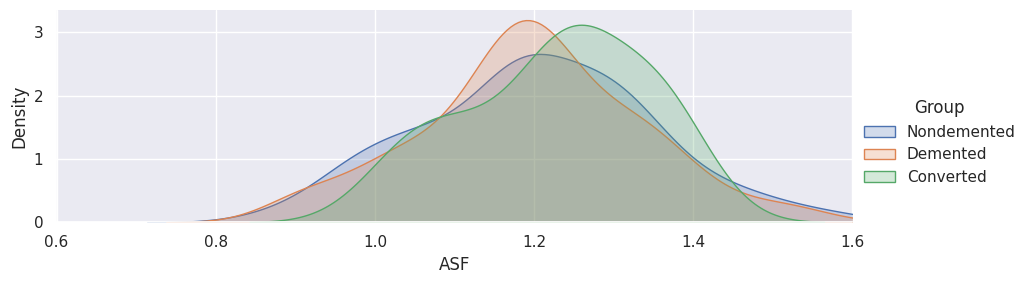

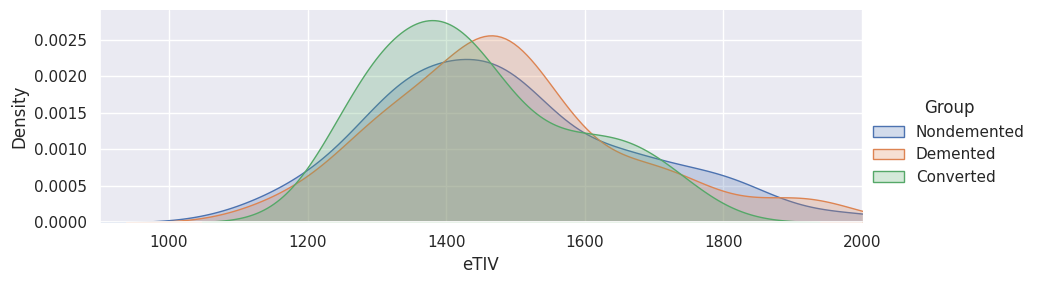

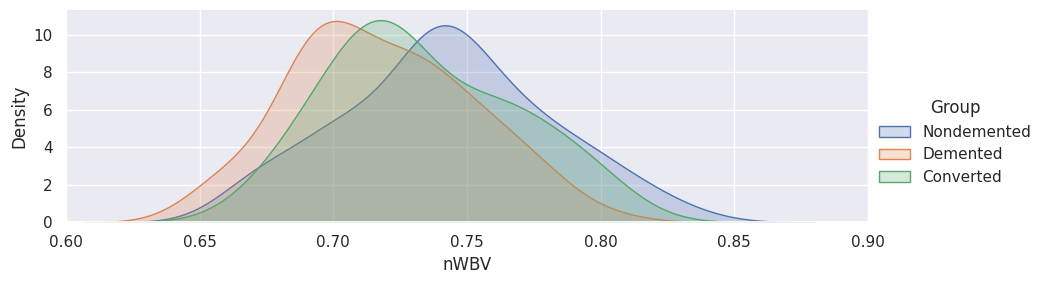

In [10]:
# Visualize the 'ASF','eTIV','nWBV' by different groups with barcharts
# barchart for 'ASF'
asf = sns.FacetGrid(mydata_cleaned,hue='Group',aspect=3)
asf.map(sns.kdeplot,'ASF',shade=True)
# Adjust x-limits to match the provided figure
asf.set(xlim=(0,mydata_cleaned['ASF'].max()))
asf.add_legend()
plt.xlim(0.6,1.6)


# barchart for 'eTIV'
etiv = sns.FacetGrid(mydata_cleaned,hue='Group',aspect=3)
etiv.map(sns.kdeplot,'eTIV',shade=True)
# Adjust x-limits to match the provided figure
etiv.set(xlim=(0,mydata_cleaned['eTIV'].max()))
etiv.add_legend()
plt.xlim(900,2000)

# barchart for 'nWBV'
nwbv = sns.FacetGrid(mydata_cleaned,hue='Group',aspect=3)
nwbv.map(sns.kdeplot,'nWBV',shade=True)
# Adjust x-limits to match the provided figure
nwbv.set(xlim=(0,mydata_cleaned['nWBV'].max()))
nwbv.add_legend()
plt.xlim(0.6,0.9)

### Research Question 1: Is the relationship between the different groups and their socioeconomic status (SES)?

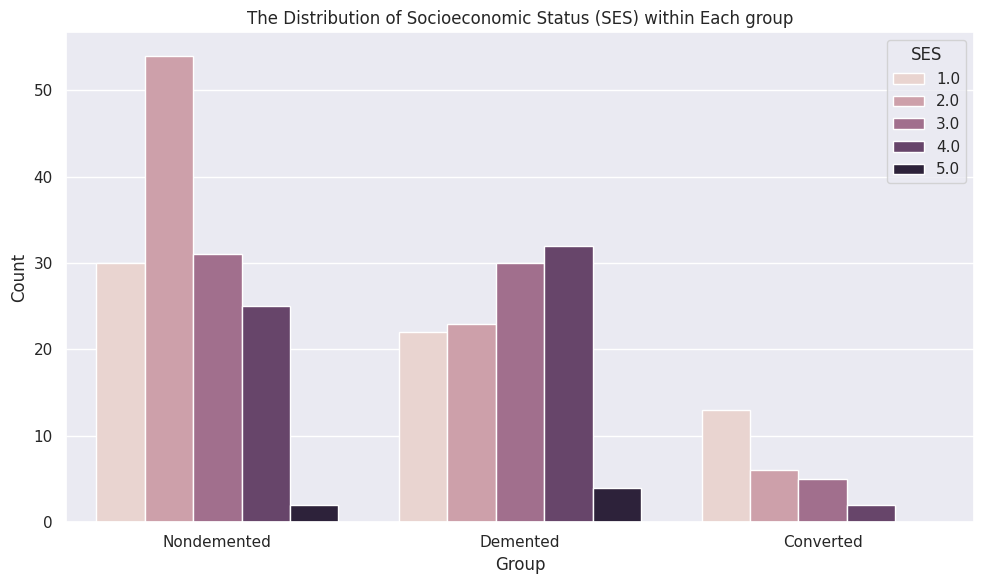

In [11]:
# set the size of figure
plt.figure(figsize=(10,6))
# create the countplot to show each group by 5 types of SES
sns.countplot(x='Group',hue='SES',data=mydata_cleaned)
# set the title and xy labels
plt.title('The Distribution of Socioeconomic Status (SES) within Each group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title='SES',loc='upper right')

# adjusting layout avoid overlapp and show it
plt.tight_layout()
plt.show()

### Research Question 2: How does the normalized whole brain volume (nWBV) change over visits in individuals with and without dementia, and is there an interaction effect between the visit number and dementia status on nWBV changes?

<ipython-input-12-073c4fdc2230>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group',y='nWBV',data=mydata_cleaned,palette=high_palette)


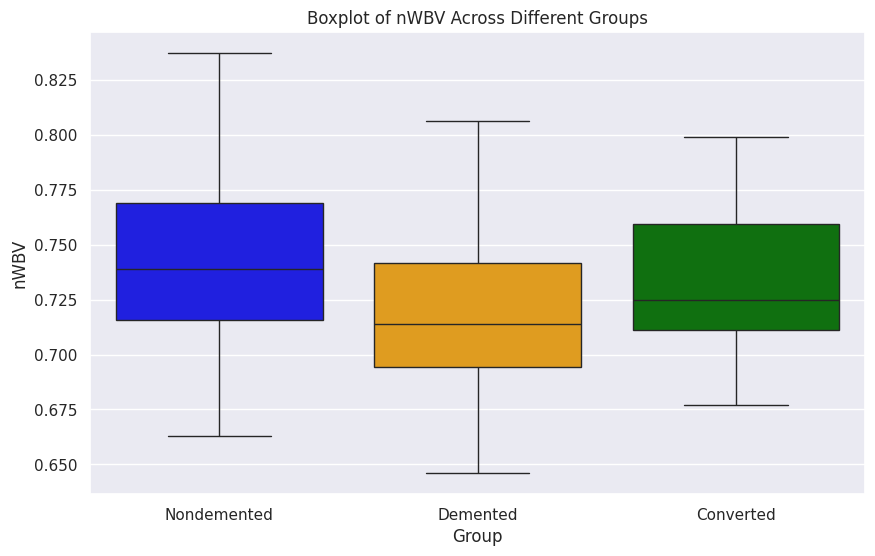

In [12]:
# create the boxplot for group comparisons on nWBV

# Assigned the high-identified colors
high_palette = ['blue','orange','green']

# Set the colors for boxplots
sns.set_palette(high_palette)

# set the size of figure
plt.figure(figsize=(10,6))
sns.boxplot(x='Group',y='nWBV',data=mydata_cleaned,palette=high_palette)
# set the title and xy labels
plt.title('Boxplot of nWBV Across Different Groups')
plt.xlabel('Group')
plt.ylabel('nWBV')
# show the plot
plt.show()

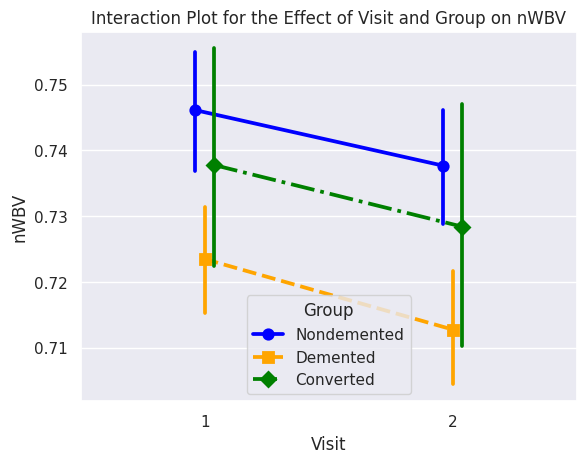

In [13]:
# create the interaction plot
sns.pointplot(data=mydata_cleaned,x='Visit',y='nWBV',hue='Group',dodge=True,markers=['o','s','D'],linestyles=["-","--","-."])
# set the title and xy labels
plt.title('Interaction Plot for the Effect of Visit and Group on nWBV')
plt.xlabel('Visit')
plt.ylabel('nWBV')
plt.legend(title='Group')
# show the plot
plt.show()

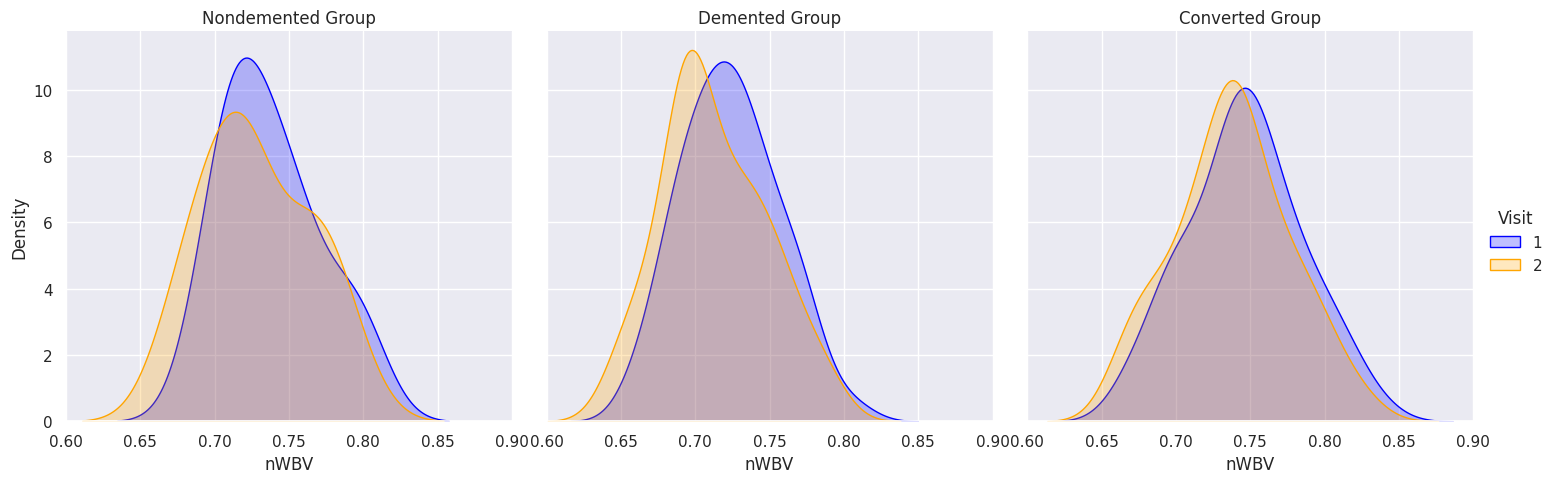

In [14]:
data1 = mydata_cleaned.copy()
# Make sure the data types are correct
data1['Group'] = data1['Group'].astype('category')
data1['Visit'] = data1['Visit'].astype('category')

# create a FacetGrid with one row per 'Group' and use 'Visit' as the hue
facet = sns.FacetGrid(data1,col='Group',hue='Visit',aspect=1,height=5,sharex=False)
facet.map(sns.kdeplot,'nWBV',fill=True)
# Adjust x-limits to match the provided figure
facet.set(xlim=(0.6,0.9))
facet.add_legend()

# set the title for subplots
titles = ['Nondemented Group','Demented Group','Converted Group']
for ax,title in zip(facet.axes.flat,titles):
  ax.set_title(title)

# show the plots
plt.show()

In [15]:
# groupby each group with visits time of observing nWBV mean differences and standard deviations
avg_table = mydata_cleaned.groupby(['Group','Visit'])['nWBV'].agg(['mean','std']).reset_index()
avg_table

,Group,Visit,mean,std
0,Converted,1,0.737786,0.033011
1,Converted,2,0.728417,0.036140
2,Demented,1,0.723482,0.032604
3,Demented,2,0.712764,0.034869
4,Nondemented,1,0.746125,0.038621
5,Nondemented,2,0.737671,0.038549


In [16]:
# import stuff here for conduct Mixed-design Anova
%pip install dfply
from dfply import *
%pip install pingouin
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import scipy.stats as stats
import pingouin as pg
from statsmodels.regression.mixed_linear_model import MixedLM
from scipy.stats import shapiro,levene,bartlett

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.9 MB/s eta 0:00:00


#### Mixed-Design ANOVA: is suitable for data sets with two or more independent variables, where at least one is a factor variable and at least one is a repeated measures variable. This design allows us to simultaneously consider between-group and within-group variations, as well as interactions between these variations and different factors.

#### Split-Plot ANOVA: is applicable to data sets with a repeated measures design, where the same individuals or samples are measured multiple times under different conditions. This design method enables us to compare changes across different conditions within the same group of subjects without concerns for inter-individual variability.

In [17]:
# Compute the two-way mixed-design ANOVA
anv = pg.mixed_anova(dv='nWBV',within='Visit',between='Group',subject='Subject ID',data=mydata_cleaned)
# print the summary of ANOVA table
pg.print_table(anv)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Group        0.033      2    134  0.017   6.384    0.002  0.087  nan
Visit        0.006      1    134  0.006  89.376    0.000  0.400    1.000
Interaction  0.000      2    134  0.000   1.630    0.200  0.024  nan



In [18]:
# conduct post-hoc test for mixed-design ANOVA
p_hocs = pg.pairwise_tests(dv='nWBV',within='Visit',between='Group',subject='Subject ID',data=mydata_cleaned)
# print the table summary
pg.print_table(p_hocs)


POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc                BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  ------------------  --------
Visit          -        1          2            True      True           9.410  136.000  two-sided        0.000  35120000000000.000     0.251
Group          -        Converted  Demented     False     True           1.436   15.523  two-sided        0.171               0.698     0.471
Group          -        Converted  Nondemented  False     True          -0.648   15.832  two-sided        0.527               0.361    -0.188
Group          -        Demented   Nondemented  False     True          -3.620  121.919  two-sided        0.000              59.810    -0.637
Visit * Group  1        Converted  Demented     False     True           1.467   15.433  two-sided        0.162               0.724

In [19]:
# import stuff here
from statsmodels.regression.mixed_linear_model import MixedLM
import statsmodels.api as sm
import statsmodels.formula.api as smf

# prepare the data: convert categorical variables to category type for modeling later
mydata_cleaned['Group'] = mydata_cleaned['Group'].astype('category')
mydata_cleaned['Visit'] = mydata_cleaned['Visit'].astype('category')

# model 1: Linear mixed-effects model with 'Group' and 'Visit' as fixed effects and 'Subject ID' as a random effect
model_formula = 'nWBV ~ Group + Visit'
model = smf.mixedlm(model_formula,mydata_cleaned,groups=mydata_cleaned['Subject ID'],re_formula="~Visit")
model_fit = model.fit()

# model 2: Linear mixed-effects model including interaction between 'Group' and 'Visit'
modell_formula = 'nWBV ~ Group * Visit'
modell = smf.mixedlm(modell_formula,mydata_cleaned,groups=mydata_cleaned['Subject ID'],re_formula="~Visit")
modell_fit = modell.fit()

# show the summaries of two models below
first_model = model_fit.summary()
sec_model = modell_fit.summary()

first_model, sec_model

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


(<class 'statsmodels.iolib.summary2.Summary'>
 """
               Mixed Linear Model Regression Results
 Model:                 MixedLM    Dependent Variable:    nWBV    
 No. Observations:      279        Method:                REML    
 No. Groups:            142        Scale:                 0.0001  
 Min. group size:       1          Log-Likelihood:        668.3732
 Max. group size:       2          Converged:             Yes     
 Mean group size:       2.0                                       
 -----------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
 -----------------------------------------------------------------
 Intercept               0.737    0.010 77.172 0.000  0.718  0.756
 Group[T.Demented]      -0.014    0.011 -1.336 0.182 -0.035  0.007
 Group[T.Nondemented]    0.009    0.010  0.902 0.367 -0.011  0.030
 Visit[T.2]             -0.010    0.001 -9.410 0.000 -0.012 -0.008
 Group Var               

<Figure size 1000x600 with 0 Axes>

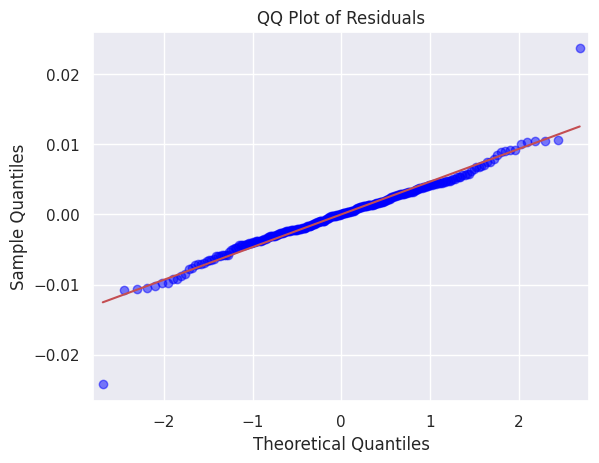

In [20]:
# Test assumption 1: extract residuals and fitted values for assumption checks
res_model = model_fit.resid
fitted_model = model_fit.fittedvalues

# set-up the size of figure layout for residual plots
plt.figure(figsize=(10,6))

# QQ plot of residuals (check Normality)
sm.qqplot(res_model,line='s',alpha=0.5)
# set the title and show the plot
plt.title('QQ Plot of Residuals')
plt.show()

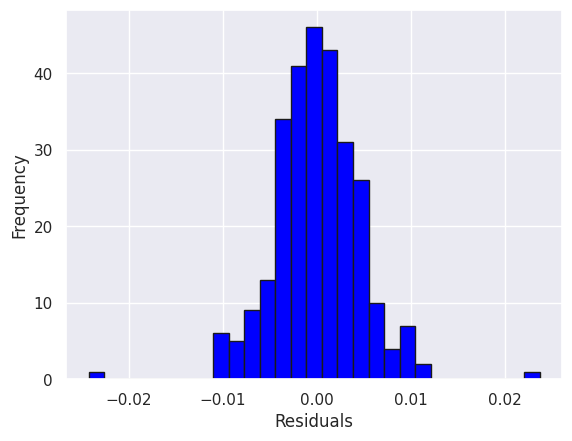

ShapiroResult(statistic=0.9605746269226074, pvalue=6.90232354827458e-07)

In [21]:
# Create a histogram and conduct the Shapiro-Wilk test for check normality of residuals
plt.hist(model_fit.resid,bins='auto',histtype='bar',ec='k')
# set the xy labels and show it
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk test
from scipy.stats import shapiro
shapiro_test = shapiro(res_model)
shapiro_test

In [22]:
# Test Assumption 2 for Homogeneity of Variances
# Because the 'Visit' variable is within-subjects, we need to test homogeneity across the 'Group' variable
Bart_test = bartlett(mydata_cleaned[mydata_cleaned['Group'] == 'Nondemented']['nWBV'], mydata_cleaned[mydata_cleaned['Group'] == 'Demented']['nWBV'], mydata_cleaned[mydata_cleaned['Group'] == 'Converted']['nWBV'])

Lev_test = levene(mydata_cleaned[mydata_cleaned['Group'] == 'Nondemented']['nWBV'], mydata_cleaned[mydata_cleaned['Group'] == 'Demented']['nWBV'], mydata_cleaned[mydata_cleaned['Group'] == 'Converted']['nWBV'])

Bart_test, Lev_test

(BartlettResult(statistic=2.226591619374443, pvalue=0.32847458538828683),
 LeveneResult(statistic=0.4889440773495573, pvalue=0.6138038063016347))

In [23]:
from math import sqrt
from statsmodels.stats.power import TTestIndPower

# list the info here
effect_size = 0.7 # Large effect size
power = 0.91
alpha = 0.05

obj = TTestIndPower()
# calculate the sample size n
n = obj.solve_power(effect_size=effect_size,alpha=alpha,power=power,ratio=1,alternative='two-sided')

# print the result
print('Sample Size Needed in Each Group: {:.3f}'.format(n))

Sample Size Needed in Each Group: 45.451


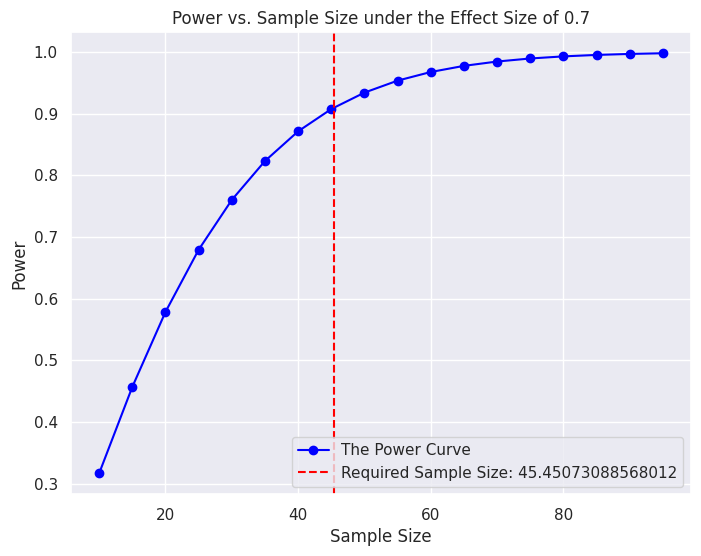

In [24]:
# create a range of sample sizes for a finer curve
spl_size = np.arange(10,100,5)
powers = obj.solve_power(effect_size=0.7,nobs1=spl_size,alpha=alpha,power=None,ratio=1.0,alternative='two-sided')

# plotting the power curve
# set the size of figure
plt.figure(figsize=(8,6))
plt.plot(spl_size,powers,'-o',color='blue',label='The Power Curve')
plt.axvline(x=n,color='red',linestyle='--',label=f'Required Sample Size: {n}')
# set the title and xy labels
plt.title('Power vs. Sample Size under the Effect Size of 0.7')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.grid(True)
plt.legend()
# show the plot
plt.show()